In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
# TITLE: Customer Segmentation & Insights Dashboard using KMeans & PCA
#---------------------------------------------------------------------------------------------------------------------------
# DISCRIPTION:
#              A machine learning project focused on segmenting customers using KMeans clustering and PCA.
#              The notebook covers end-to-end preprocessing, dimensionality reduction, and insightful
#              visualizations to identify distinct customer groups. Suitable for portfolio and marketing analytics use cases.
#----------------------------------------------------------------------------------------------------------------------------

In [ ]:
# import libraries

import pandas as pd
import numpy as np

# for standardization and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

# for Linear Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for Decision Tree Analysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# for clustering analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# File Paths

json_filepath="C:\\Users\\muhum\\Downloads\\electronics.json"
csv_filepath="C:\\Users\\muhum\\Downloads\\electronics.csv"

try:
    # Load the JSON file into a pandas DataFrame
    data = pd.read_json(json_filepath)

    # Save the data to a CSV file
    data.to_csv(csv_filepath, index=False)
    print(f"The data has been successfully converted from JSON to CSV.")

    # Summary statistics to show csv data is properly working
    print("\nSummary Statistics (Numerical Columns):")
    print(data.describe())
except Exception as e:
    print(f"Error occured while converting JSON to CSV: {e}")

The data has been successfully converted from JSON to CSV.

Summary Statistics (Numerical Columns):
       Will_Purchase_Next_Month
count                1000.00000
mean                    0.86800
std                     0.33866
min                     0.00000
25%                     1.00000
50%                     1.00000
75%                     1.00000
max                     1.00000


In [ ]:
# Module 1: Data Acquisition and Preprocessing

In [ ]:
# 1- Data Acquisation
print(data.columns)
data = pd.read_csv(csv_filepath)

# Ensure required columns are present
required_columns = [
    'Customer_ID',          # Customer demographics
    'Age',                  # Customer demographics
    'Gender',               # Customer demographics
    'Income_Level',         # Customer demographics
    'Purchase_Date',        # Transaction date
    'Product_ID',           # Product details
    'Brand',                # Product details
    'Purchase_Amount',      # Spending amounts
    'Transaction_ID'        # Purchase history (linked to purchases)
]

# Check for missing columns
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Warning: The following required columns are missing: {', '.join(missing_columns)}")
else:
    print("All required columns are present!")

# Filter the data to include only the required columns
filteredData = data[required_columns]

 # Save the filtered data to the same CSV file, overwriting it
filteredData.to_csv(csv_filepath, index=False)
print(f"Filtered Data saved to: {csv_filepath}")

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')
All required columns are present!
Filtered Data saved to: C:\Users\muhum\Downloads\electronics.csv


In [ ]:
# 2- Data Cleaning

# Step 1: Handle Missing Values

print("\nStep 1: Handling missing values")

missingValue = filteredData.isnull().sum()
print(missingValue)

# handle numerical columns with mean
numericalColumns = data.select_dtypes(include=['float64', 'int64']).columns
data[numericalColumns] = data[numericalColumns].fillna(data[numericalColumns].mean())

# handle categorical columns with mode
categoricalColumns = data.select_dtypes(include=['object']).columns
for col in categoricalColumns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill with the most frequent value

# Verify that all missing values are filled
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

print("\nMissing Values handled successfully.")
print("--------------------------------------")

#-------------------------------------------------

# Step 2: Identifying Outliers

print("\nStep 2: Identifying Outliers")

print(f"\nShape before handling outliers: {data.shape}")

numericalColumns=data.select_dtypes(include=['float64', 'int64']).columns

# IQR method
for col in numericalColumns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    outliers = data[(data[col] < lowerbound) | (data[col] > upperbound)]

    print(f"\nOutliers detected in column '{col}': {len(outliers)}")
    data = data[(data[col] >= lowerbound) & (data[col] <= upperbound)]
    print(f"Shape after handling outliers: {data.shape}")

print(f"\nFinal Shape after handling outliers: {data.shape}")

print("Identifying and Anaylzing completed.")
print("--------------------------------------")

#-------------------------------------------------

# Step 3: Inconsistencies in data format and Encoding

print("\nStep 3: Inconsistencies in data format and Encoding")

# 1- Converting Purchase Date column to a consistent format

data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], errors='coerce').dt.strftime('%Y-%m-%d')
print("\nOriginal 'Purchase Date' after conversion:")
print(data[['Purchase_Date']].head())
#-------------------------------------------------

# 2- Standardizing the categorical columns

# Standardization for Gender
data['Gender'] = data['Gender'].str.strip().str.lower()
print("\nUnique values in 'Gender' after standardization:")
print(data['Gender'].unique())

# Standardization for Income Level
data['Income_Level'] = data['Income_Level'].str.strip().str.capitalize()
print("\nUnique values in 'Income Level' after standardization:")
print(data['Income_Level'].unique())
#-------------------------------------------------

# 3- Standardizing the numerical columns

# Standardization for Purchase Amount
data['Purchase_Amount'] = pd.to_numeric(data['Purchase_Amount'], errors='coerce')
print("\nNon-numeric 'Purchase Amount' values after standardization:")
print(data[['Purchase_Amount']].head())

# Standardization for Age
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
print("\nNon-numeric 'Age' values after standardization:")
print(data[['Age']].head())
#-------------------------------------------------

# 4- Handle Encoding issues
encoding_check = data.apply(lambda x: x.str.encode('utf-8').str.decode('utf-8') if x.dtype == 'object' else x)
encoding_changes = data != encoding_check
if encoding_changes.any().any():
    print("\nEncoding issues detected and fixed in the following columns:")
    print(encoding_changes.columns[encoding_changes.any()])
else:
    print("\nNo encoding issues detected.")


Step 1: Handling missing values
Customer_ID        32
Age                33
Gender             33
Income_Level       41
Purchase_Date      35
Product_ID         40
Brand              46
Purchase_Amount    33
Transaction_ID     39
dtype: int64

Missing values after handling:
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
Will_Purchase_Next_Month         0
dtype: int64

Missing Values handled successfully.
--------

In [ ]:
# 3- Data Transformation

# Step 1: Creating new features
print("\nStep 1: Creating the new features")

# a- Average Spending per Purchase
data['Average_Spending_Per_Purchase'] = data['Purchase_Amount']/data.groupby('Customer_ID')['Transaction_ID'].transform('count')
print("\n1- Sample of Average Spending per Purchase:")
print(data[['Customer_ID','Average_Spending_Per_Purchase']].head())

# b- Purchase Frequency Per Month
data['Purchase_Frequency_Per_Month'] = pd.to_datetime(data['Purchase_Date'], errors='coerce').dt.month_name()
monthly_counts = data.groupby('Purchase_Frequency_Per_Month')['Transaction_ID'].count()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthlyCounts = monthly_counts.reindex(months, fill_value=0)
print("\n2- Total purchase frequency by month:")
print(monthlyCounts)

# c- Brand Affinity Score
brandPurchases = data.groupby(['Customer_ID', 'Brand'])['Transaction_ID'].transform('count')
totalPurchases = data.groupby('Customer_ID')['Transaction_ID'].transform('count')
data['Brand_Affinity_Score'] = brandPurchases/totalPurchases
print("\n3- Brand Affinity Score:")
print(data[['Customer_ID', 'Brand', 'Brand_Affinity_Score']].drop_duplicates().head())
# Average Brand Affinity Score according to each brand
brand_affinity = data.groupby('Brand')['Brand_Affinity_Score'].mean().sort_values(ascending=False)
print("\nAverage Brand Affinity Score by Brands:", brand_affinity)

# d- Product Category Preferences
data['Product_Category'] = data['Product_ID'].str.split('-').str[0]
categoryPurchases = data.groupby(['Customer_ID', 'Product_Category'])['Transaction_ID'].transform('count')
data['Product_Category_Preferences'] = categoryPurchases / totalPurchases
print("\n4- Product Category Preferences:")
print(data[['Product_Category', 'Product_Category_Preferences']].drop_duplicates().head())
print("--------------------------------------------")

#--------------------------------------------------

# Step 2: Standardization and Normalization
print("\nStep 2: Standardization and Normalization")

# 1- Standardization for Numeric Features
numeric_features = ['Purchase_Amount', 'Age', 'Average_Spending_Per_Purchase']
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[numeric_features])
data[['Purchase_Amount_Std', 'Age_Std', 'Average_Spending_Per_Purchase_Std']] = data_standardized
print("\n1- Standardized Numeric Features:")
print(data[['Purchase_Amount_Std', 'Age_Std', 'Average_Spending_Per_Purchase_Std']].head())

# 2- Normalization for Numeric Features
numeric_features = ['Purchase_Amount', 'Age', 'Average_Spending_Per_Purchase']
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[numeric_features])
data[['Purchase_Amount_Norm', 'Age_Norm', 'Average_Spending_Per_Purchase_Norm']] = data_normalized
print("\n2- Normalized Numeric Features:")
print(data[['Purchase_Amount_Norm', 'Age_Norm', 'Average_Spending_Per_Purchase_Norm']].head())


Step 1: Creating the new features

1- Sample of Average Spending per Purchase:
                            Customer_ID  Average_Spending_Per_Purchase
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43                     193.000000
1                                Hidden                       8.153846
2  fdf79bcd-5908-4c90-8501-570ffb5b7648                     197.000000
3  878dccba-893a-48f9-8d34-6ed394fa3c9c                     262.000000
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743                     429.000000

2- Total purchase frequency by month:
Purchase_Frequency_Per_Month
January      79
February     57
March        68
April        63
May          66
June         85
July         59
August       74
September    81
October      65
November     66
December     68
Name: Transaction_ID, dtype: int64

3- Brand Affinity Score:
                            Customer_ID    Brand  Brand_Affinity_Score
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43  Brand_C              1.000000
1                              

In [ ]:
# Module 2: Exploratory Data Analysis (EDA)

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month', 'Purchase_Amount_Std', 'Age_Std',
       'Average_Spending_Per_Purchase_Std', 'Purchase_Amount_Norm', 'Age_Norm',
       'Average_Spending_Per_Purchase_Norm'],
      dtype='object')
Descriptive Statistics: 

              Age  Purchase_Amount
count  862.000000       824.000000
mean    49.638051       250.915049
std     18.486115       140.310834
min     18.000000        10.000000
25%     34.000000       134.500000
50%     49.000000       247.000000
75%     66.000000       377.000000
max     80.000000       500.000000


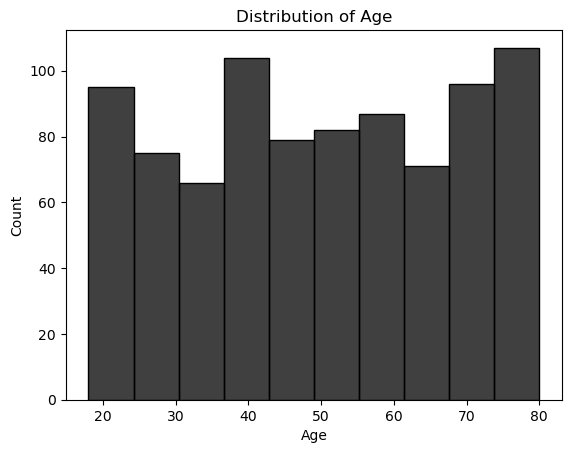

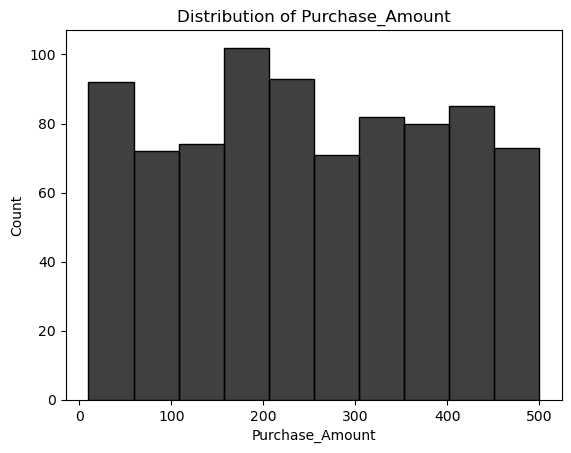

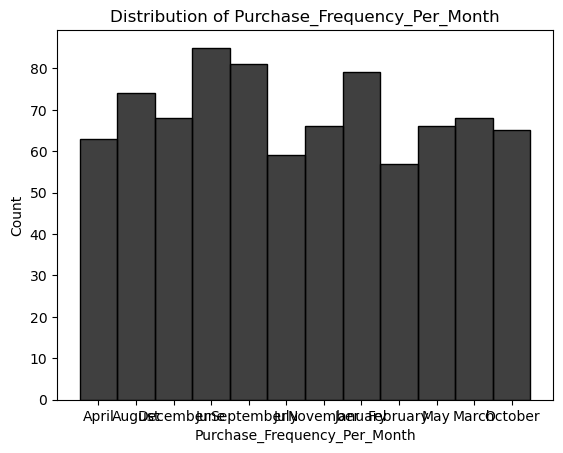

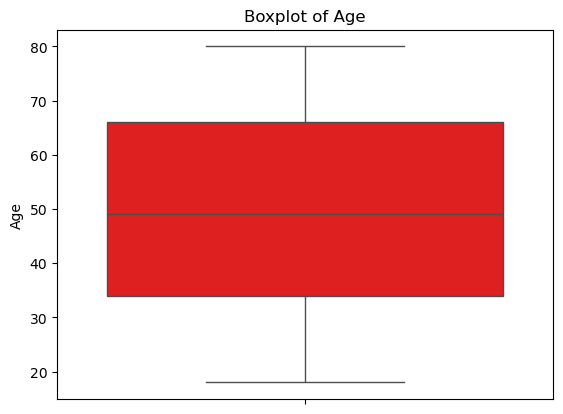

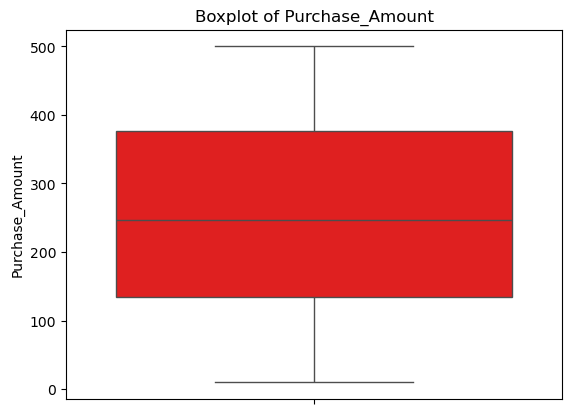

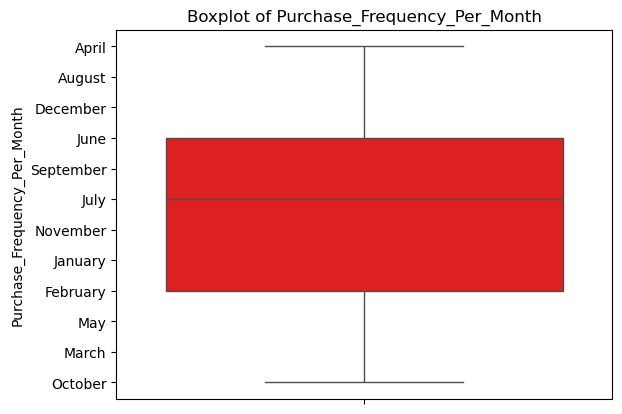

In [ ]:
print(data.columns)
# 1- Univariate Analysis
print("Descriptive Statistics: \n")
print(data[['Age','Purchase_Amount','Purchase_Frequency_Per_Month']].describe())

# Histogram for skewness
features=['Age','Purchase_Amount','Purchase_Frequency_Per_Month']
for feature in features:
    plt.figure(figure=(6,4))
    sns.histplot(data[feature], bins=10, color='black')
    plt.title(f"Distribution of {feature}")
    plt.show()

# Boxplot for outliers
for feature in features:
    plt.figure(figure=(6,4))
    sns.boxplot(y=data[feature], color='red')
    plt.title(f"Boxplot of {feature}")
    plt.show()

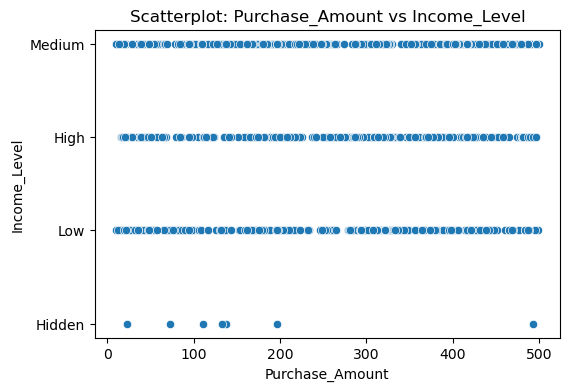

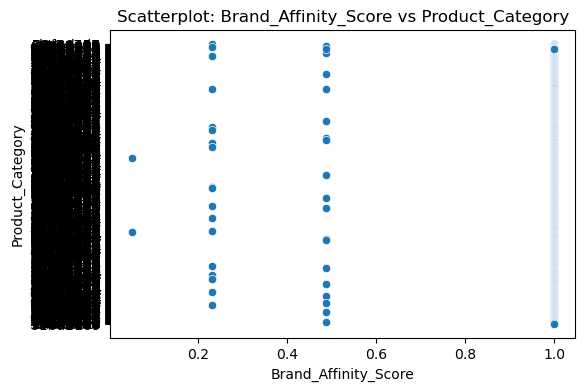

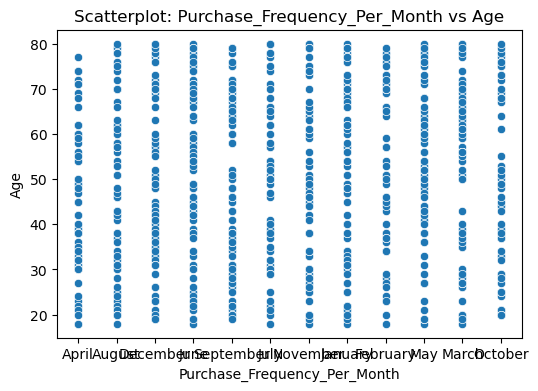

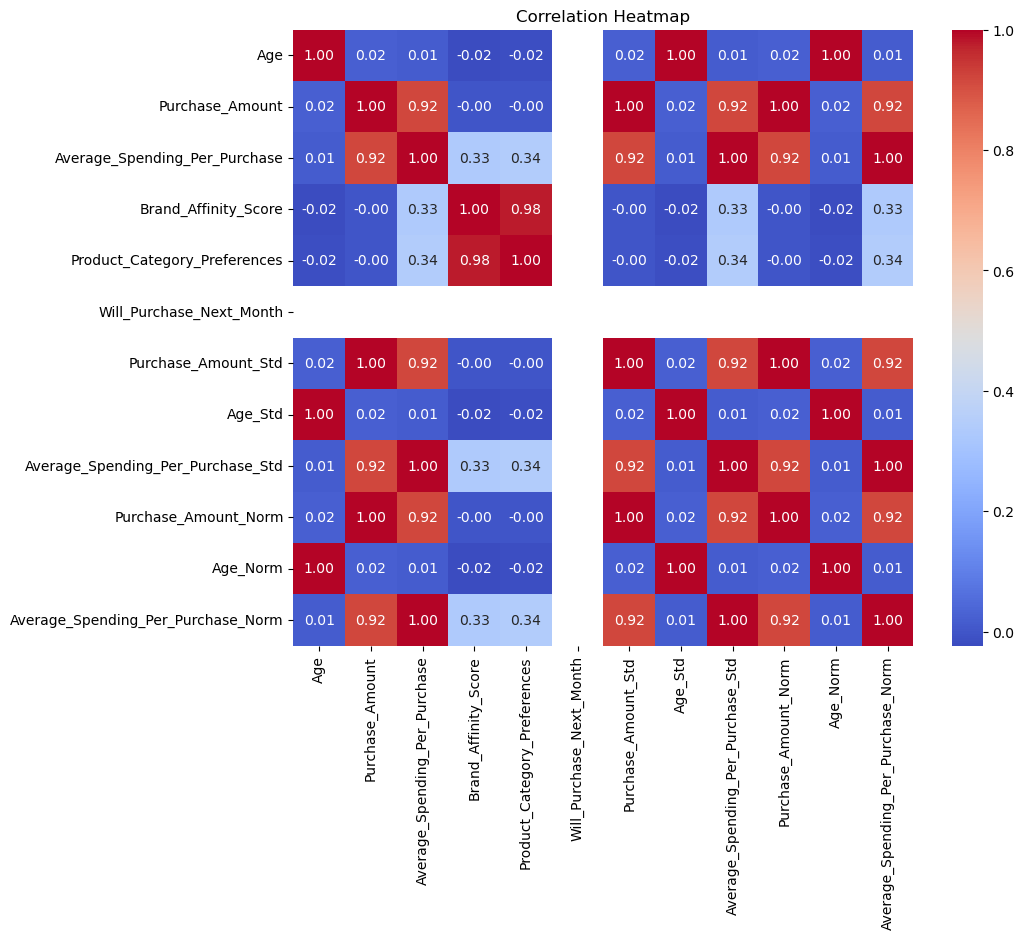

In [ ]:
# 2- Bivariate Analysis
# Building Scatterplot and Heatmap

# Scatterplot
relationships=[
    ('Purchase_Amount','Income_Level'),
    ('Brand_Affinity_Score','Product_Category'),
    ('Purchase_Frequency_Per_Month','Age')
]

for x, y in relationships:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f"Scatterplot: {x} vs {y}")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_data=data.select_dtypes(include=['number'])
correlationMatrix = numeric_data.corr()
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

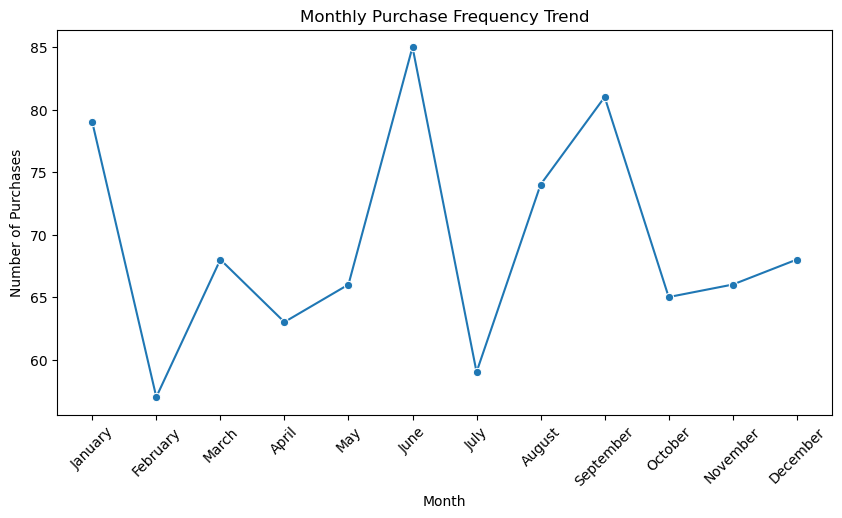

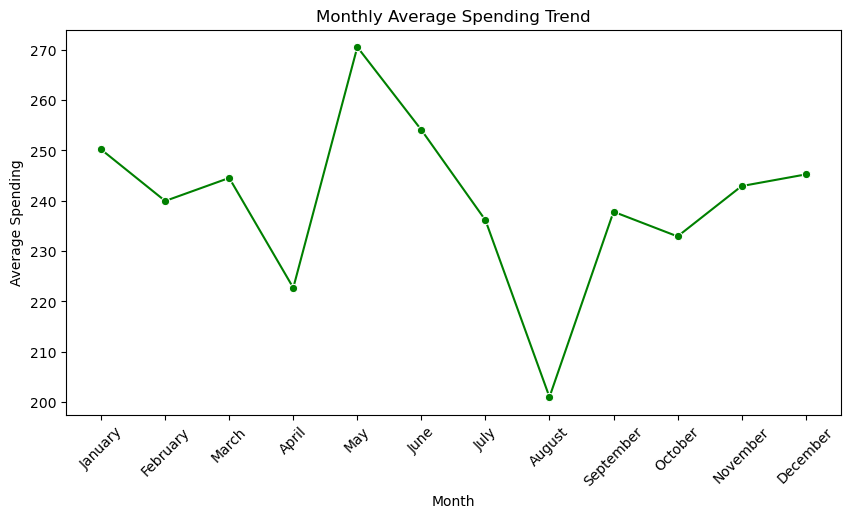

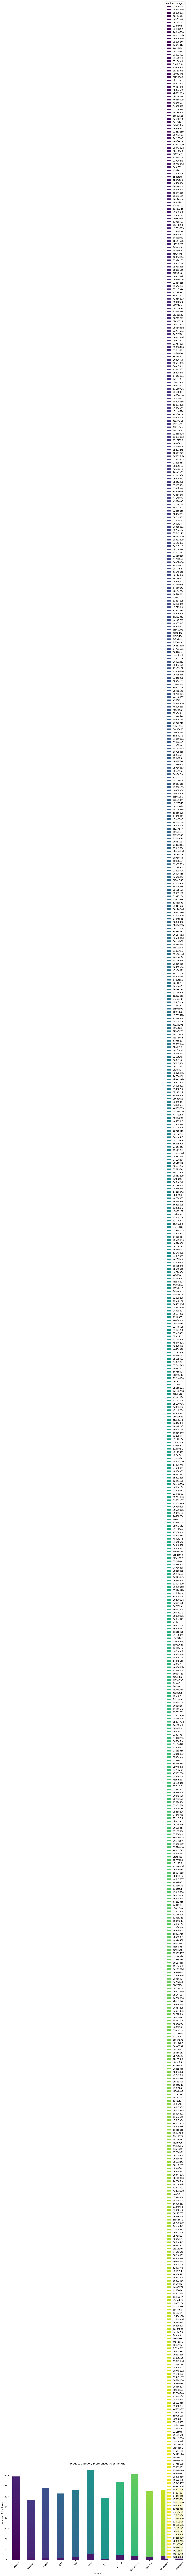

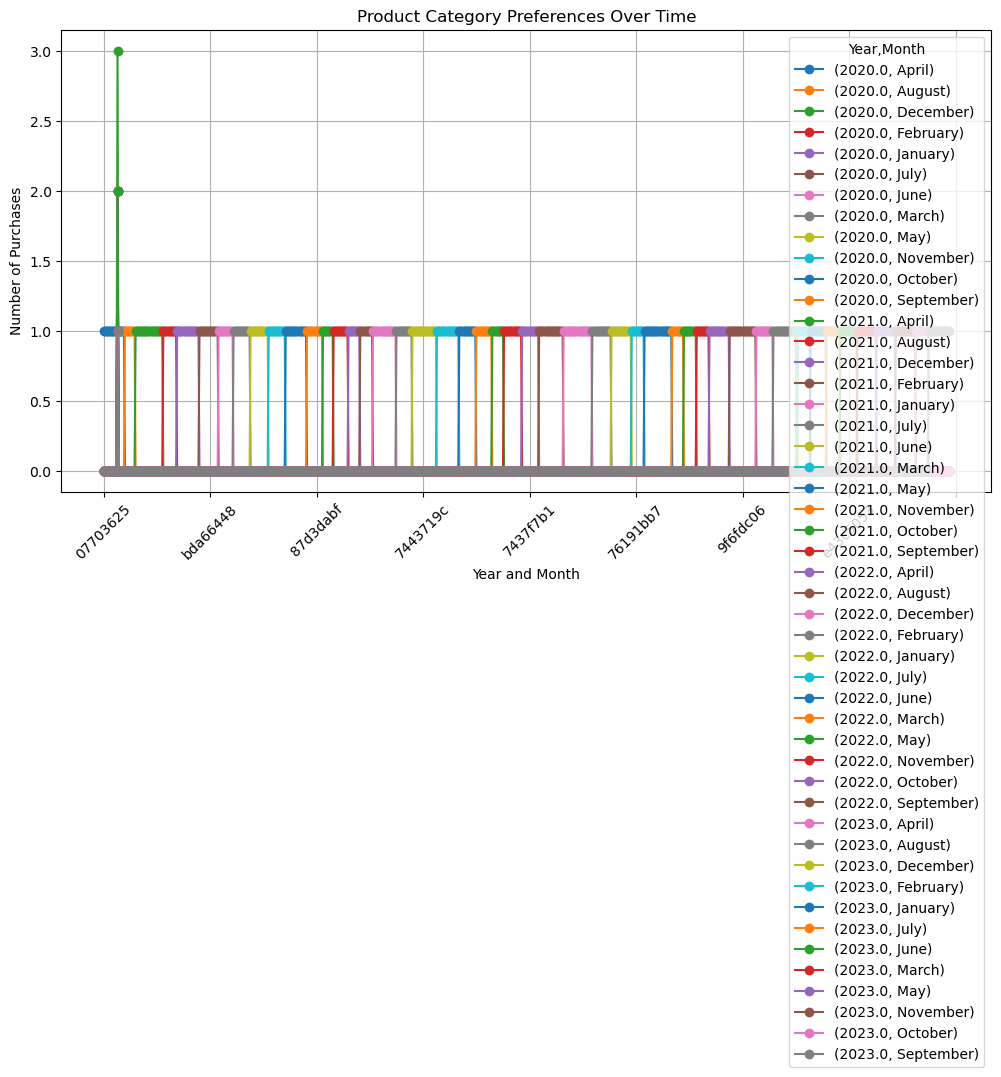

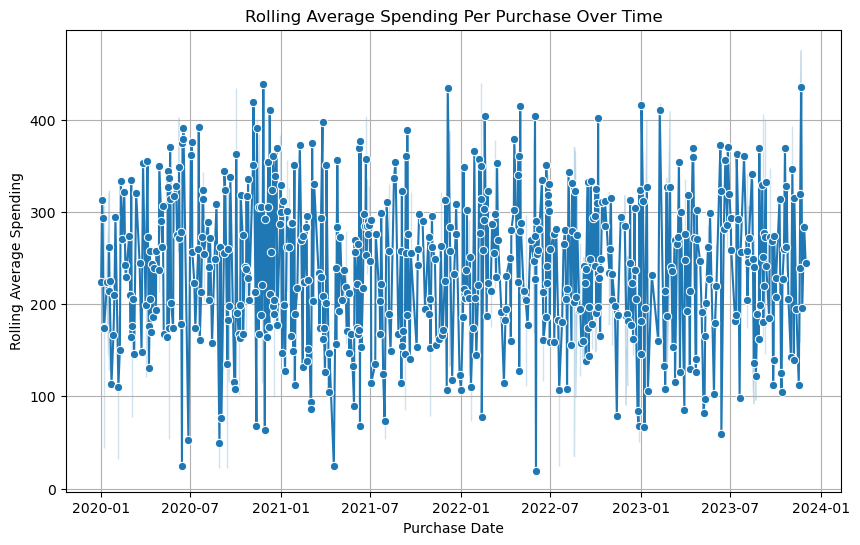

In [ ]:
# Temporal Analysis

# Step 1: Analyse trends in customer behaviour

# 1. Monthly Purchase Frequency Trend
monthly_data = data.groupby('Purchase_Frequency_Per_Month')['Transaction_ID'].count().reindex(months, fill_value=0)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, marker="o")
plt.title("Monthly Purchase Frequency Trend")
plt.ylabel("Number of Purchases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# 2. Average Spending Over Months
data['Month'] = pd.to_datetime(data['Purchase_Date']).dt.month
monthly_avg_spending = data.groupby('Month')['Average_Spending_Per_Purchase'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_spending, marker="o", color="green")
plt.title("Monthly Average Spending Trend")
plt.ylabel("Average Spending")
plt.xlabel("Month")
plt.xticks(range(1, 13), months, rotation=45)
plt.show()

# 3. Product Category Preferences Over Time
category_trend = data.groupby(['Month', 'Product_Category'])['Transaction_ID'].count().unstack()
category_trend.plot(kind='bar', stacked=True, figsize=(15, 8), colormap="viridis")
plt.title("Product Category Preferences Over Months")
plt.ylabel("Number of Purchases")
plt.xlabel("Month")
plt.xticks(range(12), months, rotation=45)
plt.legend(title="Product Category")
plt.show()

#-----------------------------------------------------------------------------
# Step 2: Checking for significant shifts in customer behavior

data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], errors='coerce')

# Extract Month and Year from the 'Purchase Date' column
data['Month'] = data['Purchase_Date'].dt.month_name()
data['Year'] = data['Purchase_Date'].dt.year

# Calculate the preference score for each product category per customer
category_preference = data.groupby(['Year', 'Month', 'Product_Category'])['Transaction_ID'].count().unstack(fill_value=0)

# Plot the trends in product category preferences over time
category_preference.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Product Category Preferences Over Time")
plt.ylabel("Number of Purchases")
plt.xlabel("Year and Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

data['Rolling_Average_Spending'] = data['Average_Spending_Per_Purchase'].rolling(window=3).mean()

# Plot the rolling average spending to identify any significant shifts or changes
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Purchase_Date', y='Rolling_Average_Spending', marker='o')
plt.title("Rolling Average Spending Per Purchase Over Time")
plt.ylabel("Rolling Average Spending")
plt.xlabel("Purchase Date")
plt.grid(True)
plt.show()

In [ ]:
# Module 3: Regression and Decision Tree Analysis

Mean Absolute Error (MAE): 112.63562640603634
Mean Squared Error (MSE): 17314.75060589528
R-squared: -0.003520523783442364


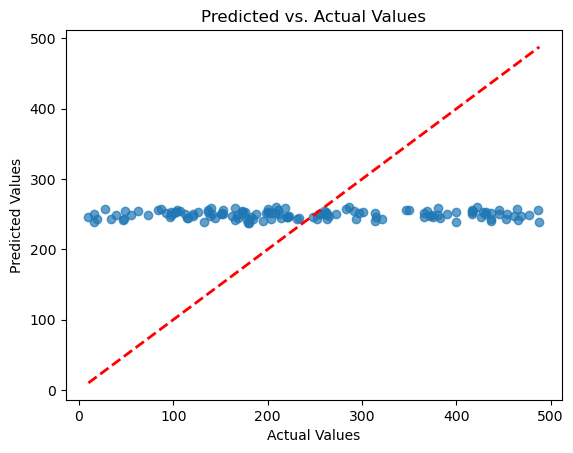

In [ ]:
# A- Linear Regression Analysis:

# Step 1: Problem Definition:

# The target variable 'Purchase_Amount' represents the average spending per purchase,
# and we aim to predict this based on demographic features like age, gender, and income level.

#--------------------------------------------------------------
# Step 2: Model Building:
data['Gender'] = data['Gender'].map({'male': 1, 'female': 0})
data['Income_Level'] = data['Income_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

data = pd.get_dummies(data, drop_first=True)
data = data.dropna()
product_category_columns = [col for col in data.columns if col.startswith('Product_Category')]

features = ['Age', 'Gender', 'Income_Level']
target = 'Purchase_Amount'

X = data[features]
y = data[target]

# Check for empty data
if X.empty or y.empty:
    raise ValueError("Features or target data is empty. Check your dataset and feature/target definitions.")

#--------------------------------------------------------------
# Step 3: Implementation:

# 1- Train Linear Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 2- Evaluate the model using Mean Absolute Error (MAE), MeanSquared Error (MSE), and R-squared.

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

#--------------------------------------------------------------
# Step 4: Visualizations
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red',linestyle='--',linewidth=2) #Regression line for better interpretability
plt.show()

Unique values in 'Will_Purchase_Next_Month': [1]
Features Shape: (441, 3)
Target Shape: (441,)
Training Set Shape: (308, 3)
Test Set Shape: (133, 3)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


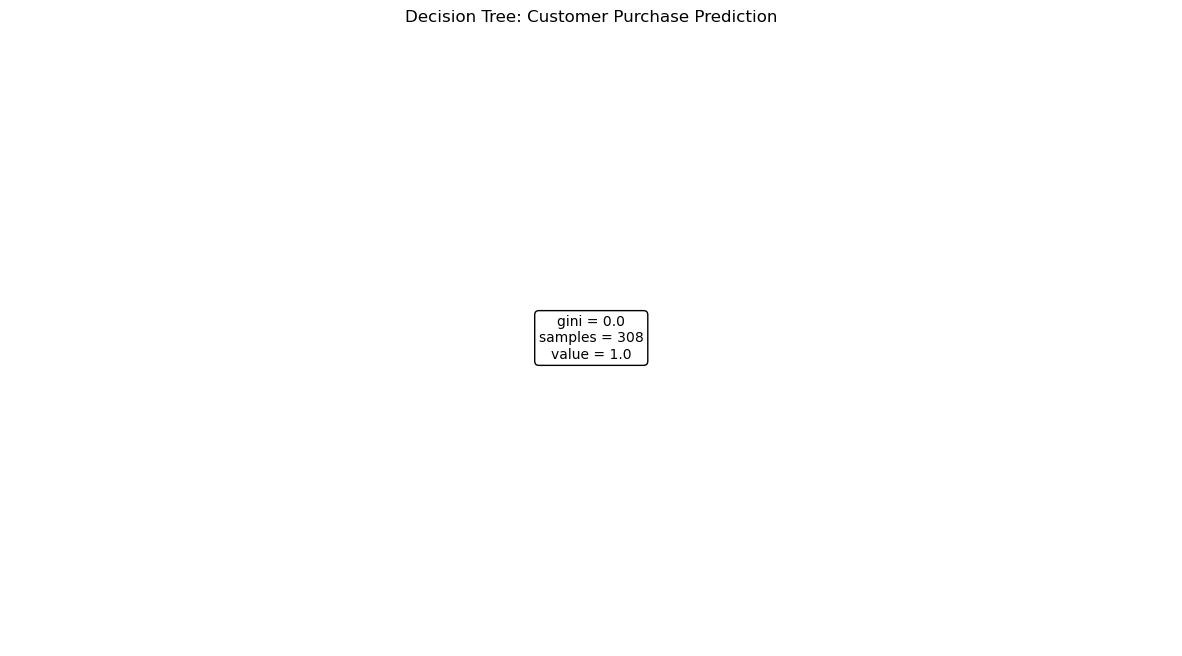

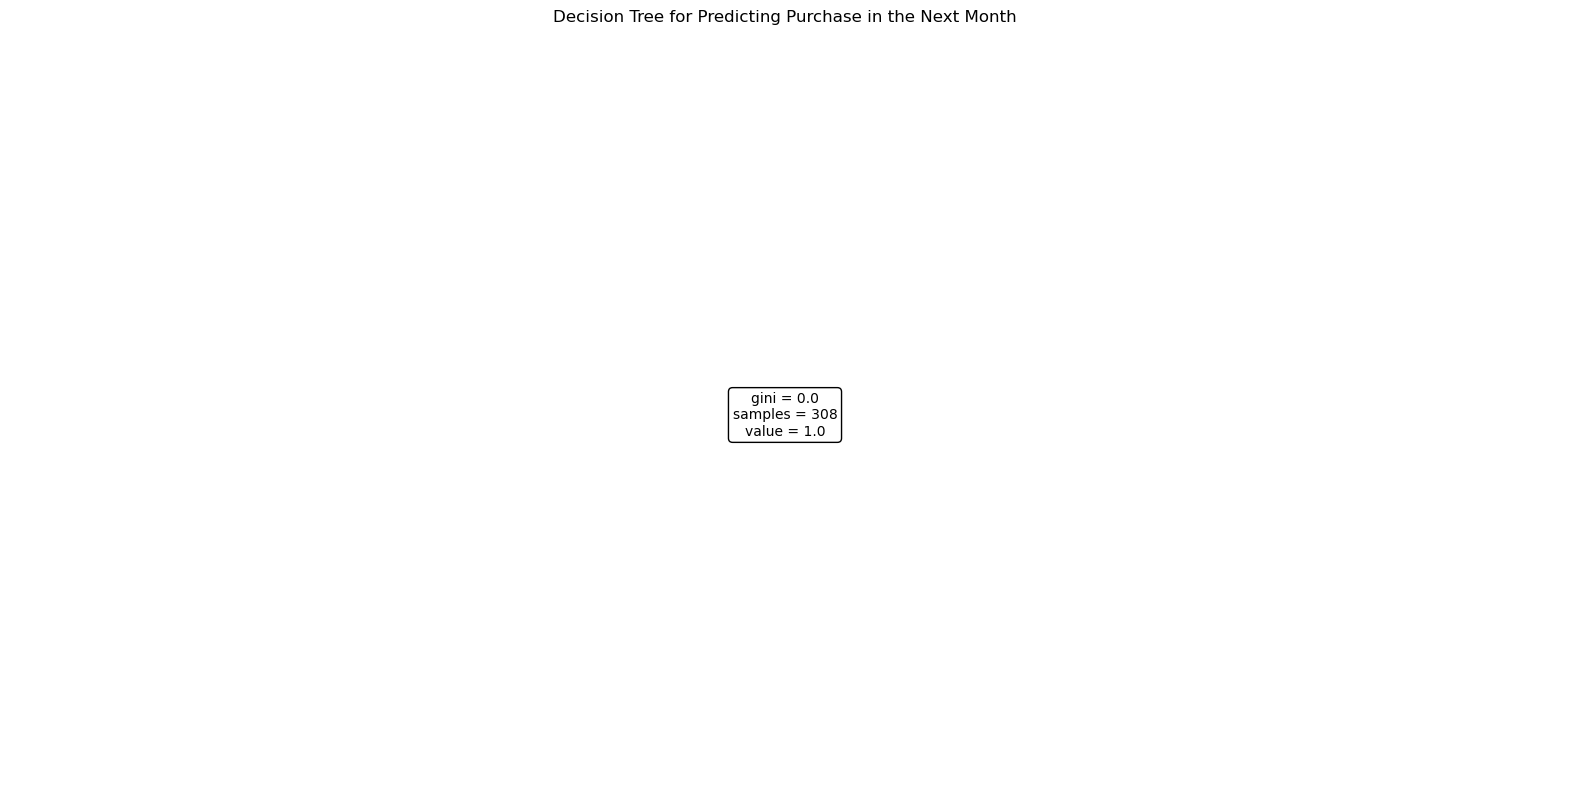

Feature Importances:
                               Importance
Brand_Affinity_Score                  0.0
Average_Spending_Per_Purchase         0.0
Product_Category_Preferences          0.0


In [ ]:
# 2- Decision Tree Analysis
# Check if feature columns exist
missing_features = [col for col in features if col not in data.columns]
if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

# Check target column
if 'Will_Purchase_Next_Month' not in data.columns:
    raise ValueError("Target column 'Will_Purchase_Next_Month' is missing.")
print("Unique values in 'Will_Purchase_Next_Month':", data['Will_Purchase_Next_Month'].unique())

# Handle missing values
data = data.fillna(data.median())  # Impute missing values

# Define features and target
features = ['Brand_Affinity_Score', 'Average_Spending_Per_Purchase', 'Product_Category_Preferences']
target = 'Will_Purchase_Next_Month'

# Extract features and target
X = data[features]
y = data[target]

# Debugging: Verify X and y
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)
if X.empty:
    print("Features are empty after preprocessing.")
if y.empty:
    print("Target is empty after preprocessing.")

# Ensure there are samples available
if X.empty or y.empty:
    raise ValueError("Features or target are empty after preprocessing. Please verify the dataset and preprocessing steps.")

# Ensure there are samples available
if X.empty or y.empty:
    raise ValueError("Features or target are empty after preprocessing. Please verify the dataset and preprocessing steps.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=features, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Customer Purchase Prediction")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Purchase in the Next Month")
plt.show()


# Feature Importances
feature_importances = pd.DataFrame(model.feature_importances_, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

In [ ]:
# Module 4: Clustering Analysis

In [ ]:
# Removing the predicted label for applying K-Means Clustering

# Drop non-numeric columns for clustering
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
data_numeric = data.drop(columns=non_numeric_cols)

# Fill missing values with median
data_numeric = data_numeric.fillna(data_numeric.median())

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Verify scaled data
print("Scaled Data Shape:", data_scaled.shape)


Scaled Data Shape: (441, 16)


U:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
U:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
U:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
U:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

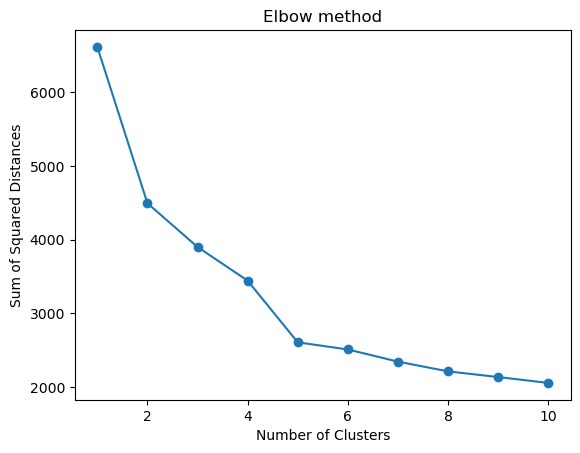

In [ ]:
# 1- Define the number of clusters(k)

data = list(zip(x, y))
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [ ]:

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters (using the first two features as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
key_features = ['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category']  # Modify these based on your actual column names

# Grouping data by 'Cluster' and calculating the mean for key features
cluster_analysis = data.groupby('Cluster')[key_features].mean()

# Display the cluster characteristics
print("Cluster Characteristics (Average values for key features):")
print(cluster_analysis)


# Plotting the distribution of 'purchase_amount' for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Purchase_Amount', data=data)
plt.title("Distribution of Purchase Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchase Amount")
plt.show()

# 3. Investigating brand affinity across clusters using a bar plot or similar visualization
# Assuming 'brand_affinity' is a categorical feature or numeric
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Brand_Affinity_Score', data=data)
plt.title("Average Brand Affinity by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Brand Affinity")
plt.show()

# 4. Investigating product category preferences across clusters
# Assuming 'product_category' is categorical, we will use count plots or similar visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', hue='Cluster', data=data)
plt.title("Product Category Preferences by Cluster")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

# 5. Investigate the similarities and differences between clusters by checking descriptive statistics for key features

# Investigating 'purchase_amount' statistics across clusters
print("\nDescriptive Statistics for 'purchase_amount' by Cluster:")
print(data.groupby('Cluster')['Purchase_Amount'].describe())

# Investigating 'brand_affinity' statistics across clusters
print("\nDescriptive Statistics for 'brand_affinity' by Cluster:")
print(data.groupby('Cluster')['Brand_Affinity_Score'].describe())

# Investigating 'product_category' distribution across clusters
print("\nProduct Category Count by Cluster:")
print(data.groupby('Cluster')['Product_Category'].value_counts())